# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [9]:
print(list(app_train.columns))

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [51]:
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [52]:
pd.crosstab(app_train['TARGET'], 
            app_train['CODE_GENDER'],  
            margins = False)

CODE_GENDER,F,M,XNA
TARGET,,,
0,188278,94404,4
1,14170,10655,0


In [53]:
pd.crosstab(app_train['TARGET'], 
            app_train['FLAG_OWN_CAR'],  
            margins = False)

FLAG_OWN_CAR,N,Y
TARGET,,
0,185675,97011
1,17249,7576


In [54]:
pd.crosstab(app_train['TARGET'], 
            app_train['FLAG_OWN_REALTY'],  
            margins = False)

FLAG_OWN_REALTY,N,Y
TARGET,,
0,86357,196329
1,7842,16983


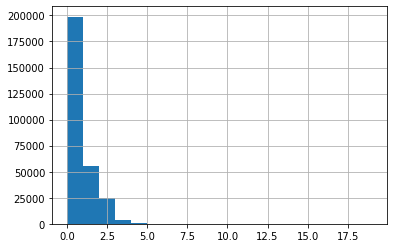

In [66]:
app_train.loc[app_train['TARGET']==0,'CNT_CHILDREN'].hist(bins=19)

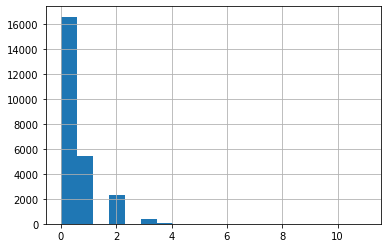

In [67]:
app_train.loc[app_train['TARGET']==1,'CNT_CHILDREN'].hist(bins=19)

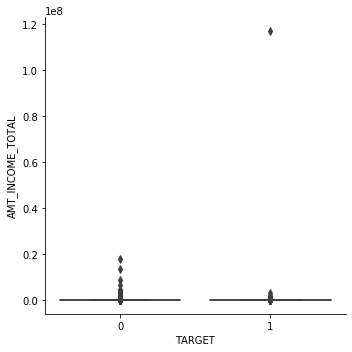

In [9]:
sns.catplot(x='TARGET',y='AMT_INCOME_TOTAL',kind='box',
           data=app_train) 

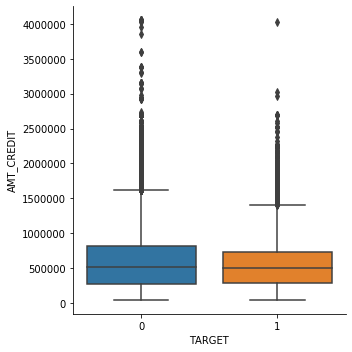

In [10]:
sns.catplot(x='TARGET',y='AMT_CREDIT',kind='box',
           data=app_train) 

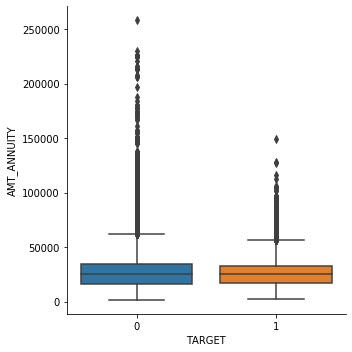

In [11]:
sns.catplot(x='TARGET',y='AMT_ANNUITY',kind='box',
           data=app_train) 

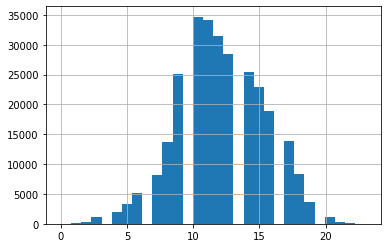

In [61]:
app_train.loc[app_train['TARGET']==0,'HOUR_APPR_PROCESS_START'].hist(bins=30)

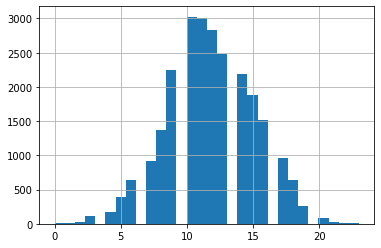

In [62]:
app_train.loc[app_train['TARGET']==1,'HOUR_APPR_PROCESS_START'].hist(bins=30)

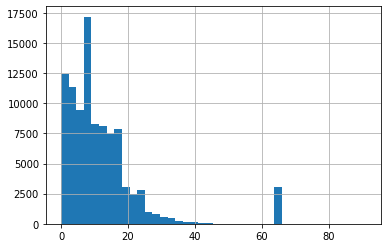

In [70]:
app_train.loc[app_train['TARGET']==0,'OWN_CAR_AGE'].hist(bins=40)

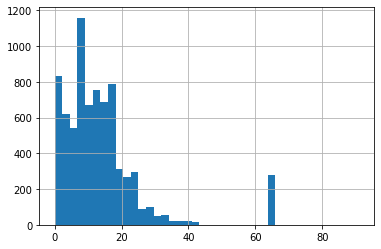

In [69]:
app_train.loc[app_train['TARGET']==1,'OWN_CAR_AGE'].hist(bins=40)

In [55]:
v0 = app_train.loc[app_train['TARGET']==0,'NAME_EDUCATION_TYPE'].value_counts()
v1 = app_train.loc[app_train['TARGET']==1,'NAME_EDUCATION_TYPE'].value_counts()

In [56]:
print(v0)

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64


In [57]:
print(v1)

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64


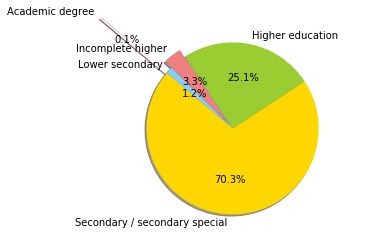

In [58]:
# V0
labels = 'Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree'
sizes = v0
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'brown']
explode = (0, 0, 0.1, 0, 1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

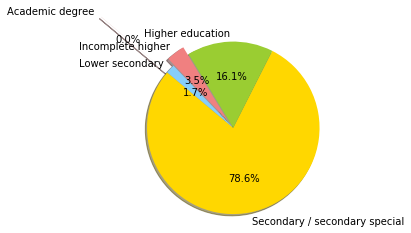

In [59]:
# V1
labels = 'Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree'
sizes = v1
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'brown']
explode = (0, 0, 0.1, 0, 1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

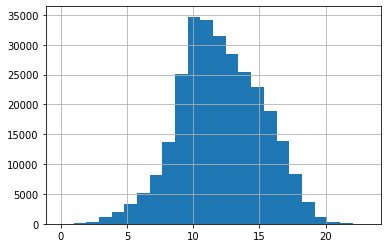

In [71]:
app_train.loc[app_train['TARGET']==0,'HOUR_APPR_PROCESS_START'].hist(bins=24)

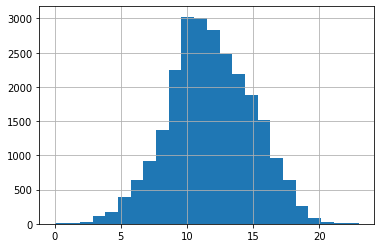

In [72]:
app_train.loc[app_train['TARGET']==1,'HOUR_APPR_PROCESS_START'].hist(bins=24)

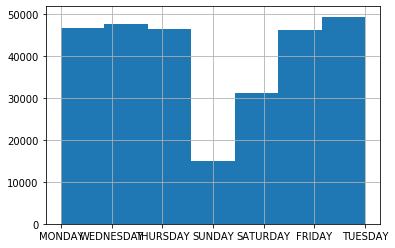

In [73]:
app_train.loc[app_train['TARGET']==0,'WEEKDAY_APPR_PROCESS_START'].hist(bins=7)

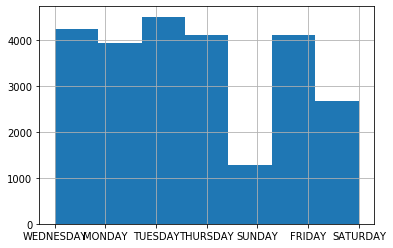

In [74]:
app_train.loc[app_train['TARGET']==1,'WEEKDAY_APPR_PROCESS_START'].hist(bins=7)

In [75]:
a = app_train.loc[app_train['TARGET']==0]
city_crosstab = pd.crosstab(a['REG_CITY_NOT_LIVE_CITY'], 
                            a['REG_CITY_NOT_WORK_CITY'],  
                               margins = False) 
print(city_crosstab) 

REG_CITY_NOT_WORK_CITY       0      1
REG_CITY_NOT_LIVE_CITY               
0                       216459  45127
1                         2880  18220


In [76]:
a = app_train.loc[app_train['TARGET']==1]
city_crosstab = pd.crosstab(a['REG_CITY_NOT_LIVE_CITY'], 
                            a['REG_CITY_NOT_WORK_CITY'],  
                               margins = False) 
print(city_crosstab) 

REG_CITY_NOT_WORK_CITY      0     1
REG_CITY_NOT_LIVE_CITY             
0                       16996  4890
1                         309  2630
